# MinION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip

columns = ['uuid','runid',
 'ch',
 'start_time',
 'flow_cell_id',
 'basecall_gpu',
 'protocol_group_id',
 'sample_id',
 'barcode',
 'barcode_alias',
 'parent_read_id',
 'basecall_model_version_id','sequence','quality']

In [126]:
columns = ['uuid', 'runid',
 'sample_id',
 'flow_cell_id',
 'protocol_group_id',
 'ch',
 'start_time',
 'basecall_model_version_id',
           'parent_read_id',
 'barcode',
 'basecall_gpu','sequence','quality']

In [179]:
fastq_folder = '/var/lib/minknow/data/basecalling/pass/barcode02/'

In [127]:
def read_fastq(fastq_file):
    with gzip.open(fastq_file, "rt") as f:
        sequences = []
        read_seq=False
        read_q=False
        
        for line in f:
            if line.startswith('@'):
                metadata = line.strip().split(' ')
                cats = [m.split('=')[-1] for m in metadata]
                name = cats[0]
                data = cats[1:]
                if len(data) == 9:
                    data.insert(7,'UNKNOWN')
                read_seq = True
                continue
            if read_seq:
                data.append(line.strip())
                read_seq=False
                read_q=True
                continue
            if read_q:
                if line.startswith('+'):
                    continue
                else:
                    data.append(np.asarray([ord(l)-33 for l in line.strip()],dtype=int))
                    sequences.append([name,*data])
                    read_q= False
    df = pd.DataFrame.from_records(sequences,columns=columns)
    return df

In [4]:
def encode(seq: str):
    pssm = np.zeros((len(seq), 4))
    revmap = {
        val: nr
        for nr, val in enumerate(['A', 'T', 'G', 'C'])}

    for nr, i in enumerate(seq):
        pssm[nr, revmap[i]] = 1  # 0.01

    return pssm

In [180]:
import os
df = None

for file in os.listdir(fastq_folder):
    fp = os.path.join(fastq_folder,file)
    new_df = read_fastq(fastq_file)
    if df is None:
        df = new_df
    else:
        df = pd.concat([df,new_df],ignore_index=True)
    
    

    

In [181]:
df

,uuid,runid,sample_id,flow_cell_id,protocol_group_id,ch,start_time,basecall_model_version_id,parent_read_id,barcode,basecall_gpu,sequence,quality
0,@d9f991eb-5e82-4c12-a025-e5d15cd926f3,872a0a6a817409ed94e65d3140d9e164320ed2be,,FBA58218,P0109,125,2025-01-30T23:17:14Z,dna_r10.4.1_e8.2_400bps_hac@v4.3.0,UNKNOWN,barcode01,NVIDIA_GeForce_RTX_4090,ACAGAGAGAATAACATAAAAACAGGGAAGCGCATTGACGGGAGAAT...,"[32, 33, 37, 36, 38, 35, 36, 34, 35, 36, 34, 3..."
1,@76684ff3-9ab3-442e-b385-e360eaa0819c,872a0a6a817409ed94e65d3140d9e164320ed2be,,FBA58218,P0109,383,2025-01-30T23:17:40Z,dna_r10.4.1_e8.2_400bps_hac@v4.3.0,UNKNOWN,barcode01,NVIDIA_GeForce_RTX_4090,TAATGGAAACTTCCTCATGAAAAAGTCTTTAGTCCTCAAAGCCTCT...,"[39, 37, 45, 38, 41, 34, 33, 41, 45, 34, 35, 3..."
2,@8a0f16a5-28ec-4bc8-911b-2e79a08c40e6,872a0a6a817409ed94e65d3140d9e164320ed2be,,FBA58218,P0109,172,2025-01-30T23:17:42Z,dna_r10.4.1_e8.2_400bps_hac@v4.3.0,UNKNOWN,barcode01,NVIDIA_GeForce_RTX_4090,ACAGAGAGAATAACATAAAAACAGGGAAGCGCATTAGACGGGAGAA...,"[38, 46, 37, 38, 29, 43, 50, 41, 43, 43, 50, 5..."
3,@8063953c-1eec-4327-be99-85e84b67ec9f,872a0a6a817409ed94e65d3140d9e164320ed2be,,FBA58218,P0109,229,2025-01-30T23:17:32Z,dna_r10.4.1_e8.2_400bps_hac@v4.3.0,UNKNOWN,barcode01,NVIDIA_GeForce_RTX_4090,ACAGAGAGAATAACATAAAAACAGGGAAGCGCATTAGACGGGAGAA...,"[40, 38, 38, 23, 23, 36, 35, 41, 41, 40, 43, 3..."
4,@dc4e92c9-4a08-469a-9b6b-6b3886a0c755,872a0a6a817409ed94e65d3140d9e164320ed2be,,FBA58218,P0109,162,2025-01-30T23:17:18Z,dna_r10.4.1_e8.2_400bps_hac@v4.3.0,UNKNOWN,barcode01,NVIDIA_GeForce_RTX_4090,ACAGAGAGAATAACATAAAAACAGGGAAGCGCGTTGACGGGAGAAT...,"[33, 34, 29, 25, 25, 19, 18, 28, 30, 38, 41, 3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309435,@cc6ae45e-4e9c-4d2a-af6c-55e0de2e7278,872a0a6a817409ed94e65d3140d9e164320ed2be,,FBA58218,P0109,164,2025-01-30T23:48:45Z,dna_r10.4.1_e8.2_400bps_hac@v4.3.0,e8e5b325-44bc-4bea-93f6-2af7aa90ca2a,barcode01,NVIDIA_GeForce_RTX_4090,TAATGGAAACTTCCTCATGAAAAAGTCTTTAGTCCTCAAAGCCTCT...,"[23, 20, 19, 19, 20, 20, 21, 24, 27, 26, 25, 2..."
309436,@cba21228-4999-44e5-bf41-352afb6f4589,872a0a6a817409ed94e65d3140d9e164320ed2be,,FBA58218,P0109,160,2025-01-30T23:48:49Z,dna_r10.4.1_e8.2_400bps_hac@v4.3.0,599a5e2d-8a31-4c08-9da5-b7074e7e4122,barcode01,NVIDIA_GeForce_RTX_4090,ACAGAGAGAATAACATAAAAACAGGGAAGCGCATTAGACGGGAGAA...,"[23, 24, 31, 26, 27, 30, 39, 39, 40, 42, 37, 3..."
309437,@9c046dfb-87c6-424f-9cbd-05c00c0d5b88,872a0a6a817409ed94e65d3140d9e164320ed2be,,FBA58218,P0109,365,2025-01-30T23:49:06Z,dna_r10.4.1_e8.2_400bps_hac@v4.3.0,UNKNOWN,barcode01,NVIDIA_GeForce_RTX_4090,TAATGGAAACTTCCTCATGAAAAAGTCTTTAGTCCTAGGAACGCCT...,"[29, 20, 32, 31, 35, 36, 32, 36, 37, 22, 21, 2..."
309438,@69a21f6b-743d-442a-b536-0ffa1155fc4d,872a0a6a817409ed94e65d3140d9e164320ed2be,,FBA58218,P0109,228,2025-01-30T23:49:03Z,dna_r10.4.1_e8.2_400bps_hac@v4.3.0,UNKNOWN,barcode01,NVIDIA_GeForce_RTX_4090,TAATGGAAACTTCCTCATGAAAAAGTCTTTAGTCCTCAAAGCCTCT...,"[22, 18, 18, 16, 24, 27, 25, 27, 38, 38, 38, 3..."


In [185]:
name, counts = np.unique(df.sequence.apply(lambda x: x[:3]),return_counts=True)

In [186]:
name,counts

(array(['AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA',
        'AGC', 'AGG', 'AGT', 'ATA', 'ATC', 'ATG', 'CAA', 'CAG', 'CAT',
        'CCA', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CTA', 'CTC', 'CTT',
        'GAA', 'GAC', 'GAG', 'GCA', 'GCC', 'GCG', 'GCT', 'GGA', 'GGG',
        'GTG', 'TAA', 'TAC', 'TAG', 'TAT', 'TCA', 'TCC', 'TCT', 'TGA',
        'TGC', 'TGG', 'TGT', 'TTA', 'TTC', 'TTG', 'TTT'], dtype=object),
 array([   480,    720,   1600,   2320, 136880,    480,   2960,    560,
          5600,     80,    160,     80,     80,    160,   2560,    160,
          4800,     80,     80,     80,     80,    240,     80,    240,
           160,     80,    560,   1520,     80,   2240,    560,    640,
           160,   1040,    400,     80,    160, 133280,    240,    240,
           240,    400,     80,    160,   1360,     80,   2560,     80,
          2160,    160,     80,     80]))

In [187]:
name[counts.argsort()]

array(['CTC', 'TGT', 'TGC', 'TCC', 'GGG', 'GAC', 'TTG', 'CGC', 'CCT',
       'CCG', 'CCA', 'CAT', 'TTT', 'AGT', 'ATA', 'AGC', 'ATC', 'TTC',
       'TCT', 'GTG', 'CTA', 'GCG', 'CAA', 'AGG', 'CGG', 'TAT', 'TAG',
       'TAC', 'CGA', 'TCA', 'GGA', 'AAA', 'ACC', 'ACT', 'GCA', 'CTT',
       'GCC', 'AAC', 'GCT', 'TGA', 'GAA', 'AAG', 'TTA', 'GAG', 'AAT',
       'TGG', 'ATG', 'ACG', 'CAG', 'AGA', 'TAA', 'ACA'], dtype=object)

In [138]:
np.asarray(list(df.sequence.apply(lambda x: encode(x[:10])).values)).mean(0)#.shape

array([[0.5       , 0.45630817, 0.02223371, 0.02145812],
       [0.47828335, 0.02016546, 0.03567735, 0.46587384],
       [0.91571872, 0.01706308, 0.05791107, 0.00930714],
       [0.07911065, 0.44338159, 0.47001034, 0.00749741],
       [0.48293692, 0.02352637, 0.47699069, 0.01654602],
       [0.08893485, 0.01499483, 0.87978283, 0.01628749],
       [0.9089969 , 0.01577042, 0.05894519, 0.01628749],
       [0.52637022, 0.02585315, 0.42942089, 0.01835574],
       [0.91054809, 0.05429162, 0.01240951, 0.02275078],
       [0.47854188, 0.07238883, 0.01525336, 0.43381593]])

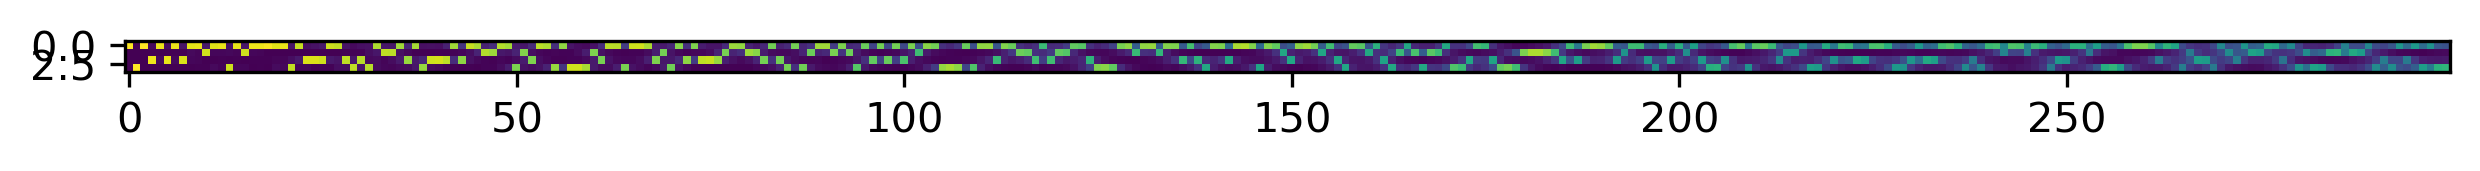

In [192]:
plt.figure(figsize=(10,8),dpi=300)
plt.imshow(np.asarray(list(df[df.sequence.str.startswith('ACA')].sequence.apply(lambda x: encode(x[:300])).values)).mean(0).transpose())

In [197]:
name,counts = np.unique(df[df.sequence.str.startswith('ACA')].sequence.apply(len),return_counts=True)

name[counts.argsort()]

array([ 634, 3867, 3859, 3768, 3605, 2950, 2318, 2013, 1995, 1990, 1986,
       3924, 1940, 1937, 1934, 1924, 3934, 1907,  819,  810,  688,  687,
       1600, 1488, 1511, 1909, 1598, 1035, 1318, 1599, 1679, 1870, 1880,
       1988, 1985, 1945, 1944, 1951, 1946, 1936, 1987, 1954, 1949, 1983,
       1958, 1956, 1948, 1957, 1955, 1984, 1952, 1982, 1953, 1960, 1959,
       1981, 1961, 1980, 1962, 1963, 1979, 1965, 1966, 1964, 1978, 1977,
       1967, 1976, 1968, 1969, 1974, 1973, 1970, 1975, 1972, 1971])

In [201]:
selected_seqs = df[(df.sequence.str.startswith('ACA') & (df.sequence.apply(len) == 1971))]

In [214]:
np.median

<function median at 0x7eb37c122270>

<Axes: >

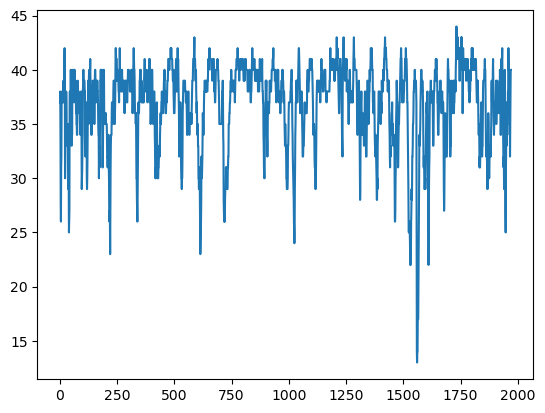

In [215]:
sns.lineplot(np.median(np.asarray(list(selected_seqs.quality.values)),axis=0))

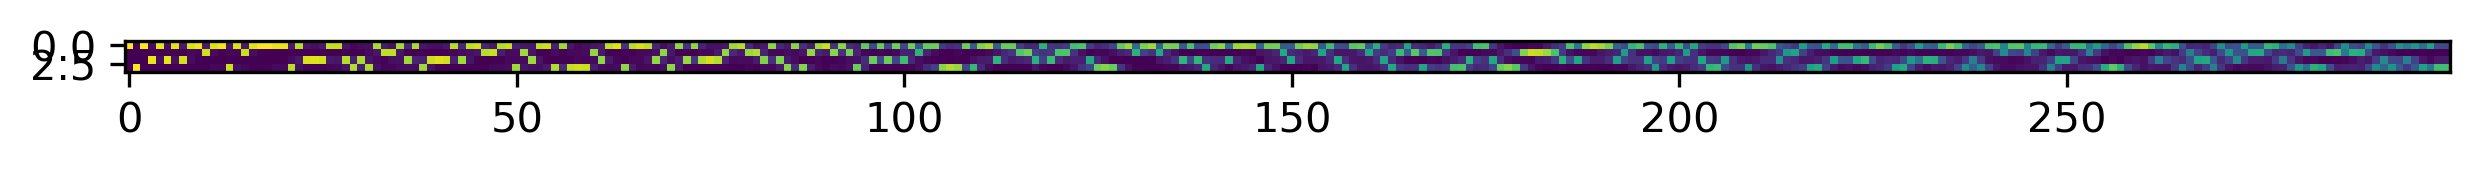

In [203]:
plt.figure(figsize=(10,8),dpi=300)
plt.imshow(np.asarray(list(selected_seqs.sequence.apply(lambda x: encode(x[:300])).values)).mean(0).transpose())

In [17]:
def read_fasta(filename):
    sequences = {}
    with open(filename, "r") as f:
        seq_id = None
        seq = []
        for line in f:
            line = line.strip()
            if line.startswith(">"):  # Header line
                if seq_id:
                    sequences[seq_id] = encode("".join(seq))
                seq_id = line[1:]  # Remove ">"
                seq = []
            else:
                seq.append(line)
        if seq_id:
            sequences[seq_id] = encode("".join(seq))  # Store last sequence
    return sequences

In [16]:
encode(x['M02654:611:000000000-LVGC2:1:1102:20715:1237 R35 BC1 protein sequence'])

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(195, 22))

In [19]:
x = read_fasta("/home/student/anna/DMS_analysis/data/fastq/R35/R35_BC1_AA_R1_001_clustalo.fa")

In [29]:
xstacked = np.stack(list(x.values())).mean(0)

In [35]:
xstacked[xstacked[:,21] < 0.95]

array([[1.78622464e-04, 4.17976565e-03, 2.85795942e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.96484710e-02],
       [0.00000000e+00, 6.07316376e-03, 3.57244927e-04, ...,
        0.00000000e+00, 0.00000000e+00, 2.23278079e-02],
       [0.00000000e+00, 0.00000000e+00, 1.78622464e-04, ...,
        7.00200057e-03, 0.00000000e+00, 2.45784510e-02],
       ...,
       [0.00000000e+00, 2.50071449e-04, 1.78622464e-04, ...,
        2.50071449e-04, 8.57387825e-04, 5.58552444e-01],
       [3.57244927e-05, 1.78622464e-04, 3.57244927e-05, ...,
        3.57244927e-05, 0.00000000e+00, 5.84024007e-01],
       [3.57244927e-05, 7.14489854e-05, 2.85795942e-04, ...,
        3.57244927e-05, 1.07173478e-04, 5.87453558e-01]], shape=(100, 22))

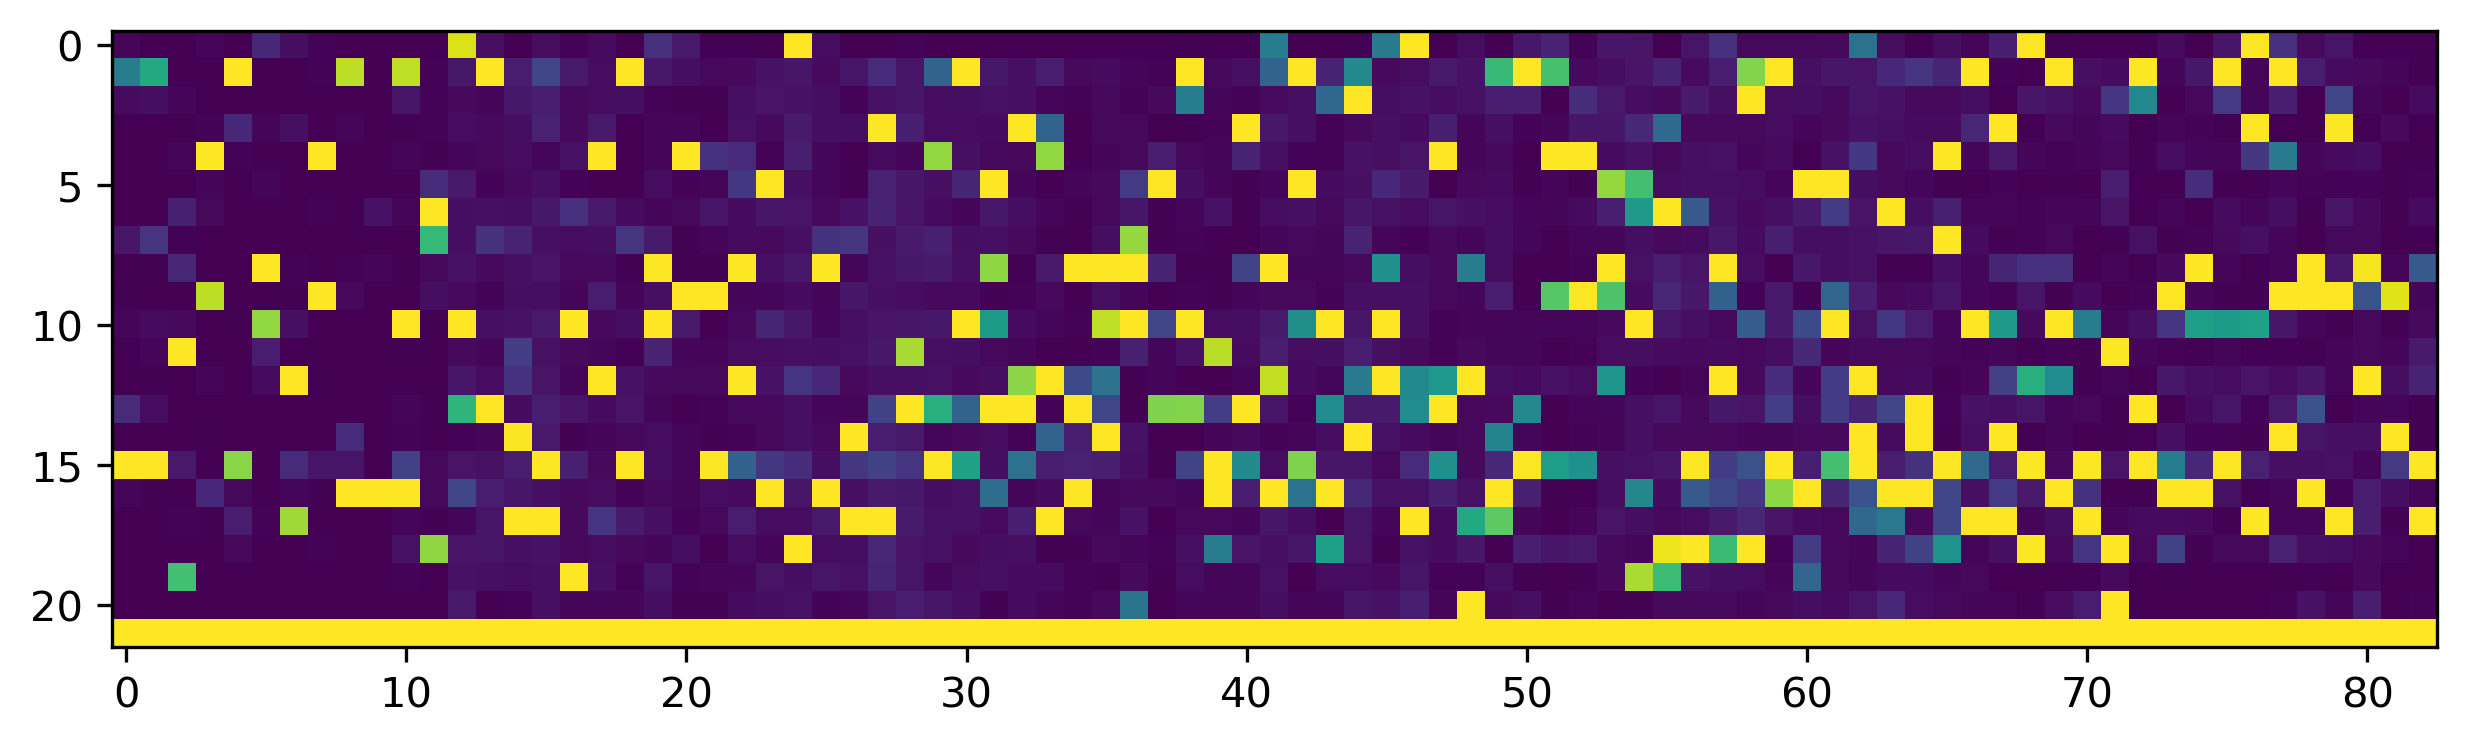

In [42]:
plt.figure(figsize=(10,8),dpi=300)
plt.imshow(xstacked[xstacked[:,21] < 0.8].T,vmin=0,vmax=0.01)

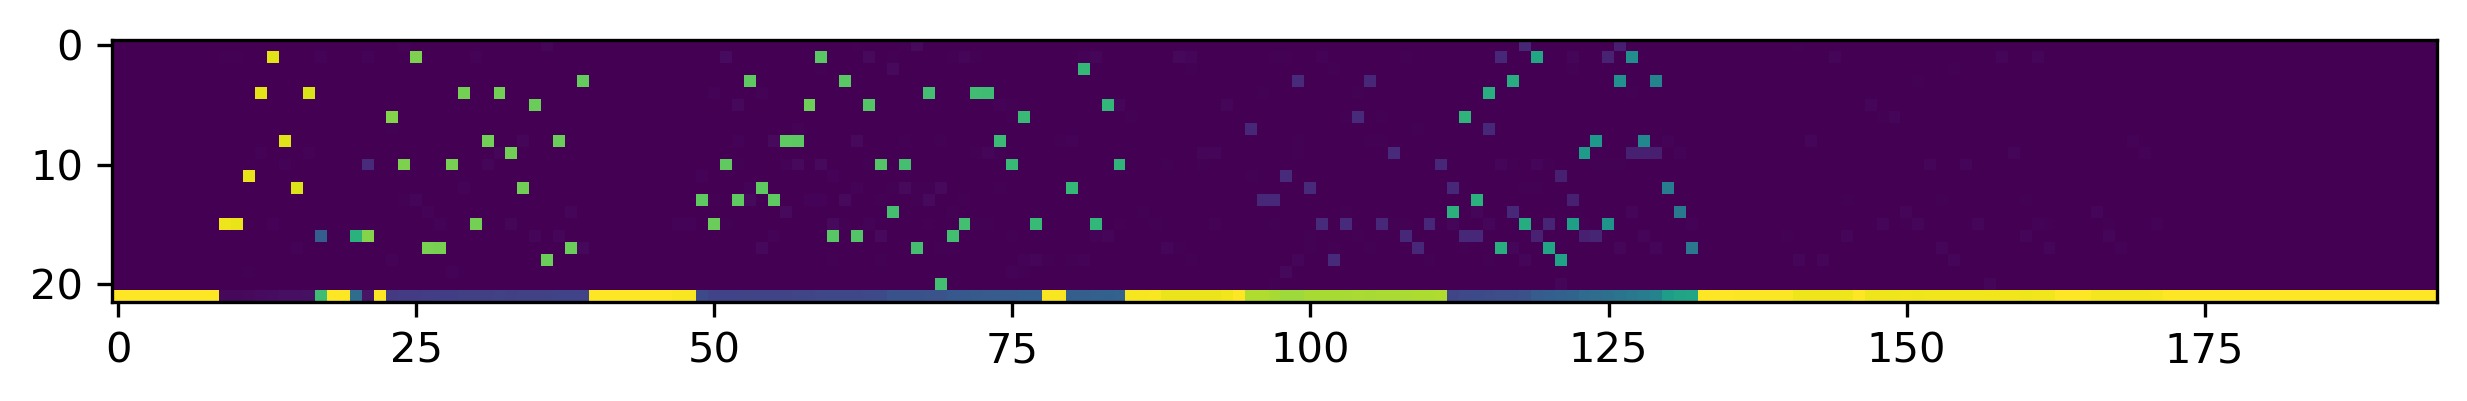

In [ ]:
plt.figure(figsize=(10,8),dpi=300)
plt.imshow(np.stack(list(x.values())).mean(0).T)

In [25]:
np.stack(list(x.values())).mean(0)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99821378e-01],
       [0.00000000e+00, 1.78622464e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99821378e-01],
       [0.00000000e+00, 0.00000000e+00, 1.78622464e-04, ...,
        0.00000000e+00, 0.00000000e+00, 9.99821378e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99392684e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99464133e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99464133e-01]], shape=(195, 22))

In [8]:
def encode(seq: str):
    pssm = np.zeros((len(seq), 22))
    revmap = {
        val: nr
        for nr, val in enumerate(['*',
 'A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y', 
 '-'])}

    for nr, i in enumerate(seq):
        pssm[nr, revmap[i]] = 1  # 0.01

    return pssm